In [1]:
import numpy as np
import random
from imutils import paths 
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import tensorflow
from PIL import Image
from tensorflow.keras.preprocessing import image_dataset_from_directory
tensorflow.compat.v1.logging.set_verbosity((tensorflow.compat.v1.logging.ERROR)) #comment while debugging

In [2]:
#!git clone https://github.com/farhansiddiqui/cnn-class.git

In [3]:
base_path = "."
#base_path = "/content/cnn-class"

In [4]:
img_height = 128
img_width = 128

model = tensorflow.keras.Sequential([
  tensorflow.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tensorflow.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tensorflow.keras.layers.MaxPooling2D(),
  tensorflow.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tensorflow.keras.layers.MaxPooling2D(),
  tensorflow.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tensorflow.keras.layers.MaxPooling2D(),
  tensorflow.keras.layers.Flatten(),
  tensorflow.keras.layers.Dense(128, activation='relu'),
  tensorflow.keras.layers.Dense(6, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0

In [6]:
model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [7]:
image_size = (img_height, img_width)
batch_size = 64

train_ds = image_dataset_from_directory(
    f"{base_path}/flowers-v-auto/training",
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    batch_size=batch_size)
val_ds = image_dataset_from_directory(
    f"{base_path}/flowers-v-auto/validation",
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    batch_size=batch_size)

test_ds = image_dataset_from_directory(
    f"{base_path}/flowers-v-auto/testing",
    labels='inferred',
    label_mode='categorical',
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False)


Found 4860 files belonging to 6 classes.
Found 540 files belonging to 6 classes.
Found 606 files belonging to 6 classes.


In [8]:
es = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
epochs = 100
hist = model.fit( train_ds, epochs=epochs, validation_data=val_ds, callbacks = [es])

Epoch 1/100
76/76 [==============================] - 13s 169ms/step - loss: 1.0566 - accuracy: 0.5640 - val_loss: 0.8247 - val_accuracy: 0.6963
Epoch 2/100
76/76 [==============================] - 10s 127ms/step - loss: 0.7180 - accuracy: 0.7165 - val_loss: 0.7329 - val_accuracy: 0.6981
Epoch 3/100
76/76 [==============================] - 9s 123ms/step - loss: 0.5267 - accuracy: 0.7979 - val_loss: 0.6299 - val_accuracy: 0.7556
Epoch 4/100
76/76 [==============================] - 9s 123ms/step - loss: 0.4077 - accuracy: 0.8479 - val_loss: 0.5263 - val_accuracy: 0.7963
Epoch 5/100
76/76 [==============================] - 9s 120ms/step - loss: 0.2899 - accuracy: 0.8969 - val_loss: 0.5608 - val_accuracy: 0.8000
Epoch 6/100
76/76 [==============================] - 9s 124ms/step - loss: 0.1985 - accuracy: 0.9282 - val_loss: 0.5506 - val_accuracy: 0.8148
Epoch 7/100
76/76 [==============================] - 9s 123ms/step - loss: 0.1266 - accuracy: 0.9591 - val_loss: 0.6079 - val_accuracy: 0.80

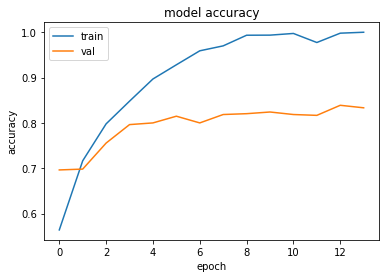

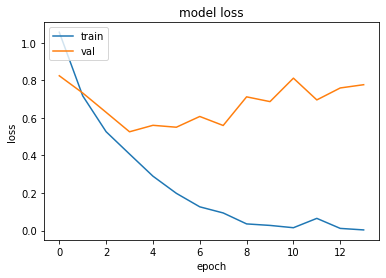

In [9]:

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
imagePaths = list(paths.list_images(f'{base_path}/flowers-v-auto/testing'))

lilies


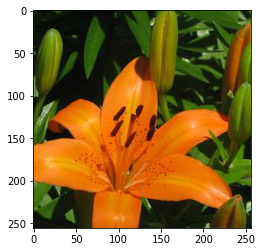

In [11]:
image = random.choice(imagePaths)
print(image.split('/')[-1].split('-')[0])
img = Image.open(image)
plt.imshow(img)

In [12]:
img = img.resize((img_height, img_width))
img_batch = np.expand_dims(img, axis=0)
prediction_class_idx = np.argmax(model.predict(img_batch), axis=-1)[0]
print(prediction_class_idx)
train_ds.class_names[prediction_class_idx]

2


'lilies'

In [13]:
def plot_confusion_matrix(cm, classes):
    cmap=plt.cm.Blues
    title='Confusion Matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

In [14]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_ds:
    predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

cm = tensorflow.math.confusion_matrix(labels=labels, predictions=predictions).numpy()

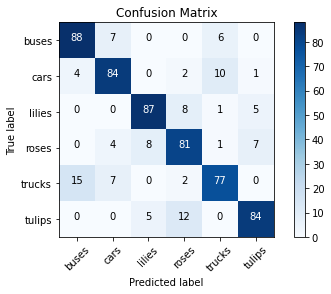

In [15]:
plot_confusion_matrix(cm, test_ds.class_names)

In [16]:
#test accuracy 
round((labels == predictions).sum()/len(predictions),2)

0.83